In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
# import re

In [2]:
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa',
          'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama',
          'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon',
          'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia',
          'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington',
          'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey',
          'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico',
          'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands',
          'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia',
          'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York',
          'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado',
          'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island',
          'MN': 'Minnesota', 'VI': 'Virgin Islands',
          'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia',
          'ND': 'North Dakota', 'VA': 'Virginia'}

In [3]:
with open("university_towns.txt","r") as file:
    data = file.readlines()

In [4]:
subs = "[edit]"
state = ""
Region = ""
df = pd.DataFrame(columns = ["State","RegionName"])

In [5]:
df

,State,RegionName


In [6]:
import re
for line in data:
    line.rstrip()
    if subs in line:
        state = line.replace(subs,"")
    else:
        Region = re.sub("\s\(.*","",line)
        df= df.append({"State": state,"RegionName":Region},ignore_index=True)

In [7]:
df

,State,RegionName
0,Alabama\n,Auburn\n
1,Alabama\n,Florence\n
2,Alabama\n,Jacksonville\n
3,Alabama\n,Livingston\n
4,Alabama\n,Montevallo\n
...,...,...
512,Wisconsin\n,River Falls\n
513,Wisconsin\n,Stevens Point\n
514,Wisconsin\n,Waukesha\n
515,Wisconsin\n,Whitewater\n


In [8]:
df["State"] = df["State"].str.strip("\n")

In [9]:
df["RegionName"] = df["RegionName"].str.strip("\n")

In [10]:
df

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
...,...,...
512,Wisconsin,River Falls
513,Wisconsin,Stevens Point
514,Wisconsin,Waukesha
515,Wisconsin,Whitewater


In [11]:
gdp = pd.read_excel("gdplev.xls",skiprows = 5)

In [12]:
gdp

,Unnamed: 0,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,Unnamed: 3,Unnamed: 4,GDP in billions of current dollars.1,GDP in billions of chained 2009 dollars.1,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1929.0,104.6,1056.6,NaN,1947q1,243.1,1934.5,NaN
3,1930.0,92.2,966.7,NaN,1947q2,246.3,1932.3,NaN
4,1931.0,77.4,904.8,NaN,1947q3,250.1,1930.3,NaN
...,...,...,...,...,...,...,...,...
275,NaN,NaN,NaN,NaN,2015q2,17998.3,16374.2,NaN
276,NaN,NaN,NaN,NaN,2015q3,18141.9,16454.9,NaN
277,NaN,NaN,NaN,NaN,2015q4,18222.8,16490.7,NaN
278,NaN,NaN,NaN,NaN,2016q1,18281.6,16525.0,NaN


In [13]:
gdp = gdp.drop([0,1])
gdp

,Unnamed: 0,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,Unnamed: 3,Unnamed: 4,GDP in billions of current dollars.1,GDP in billions of chained 2009 dollars.1,Unnamed: 7
2,1929.0,104.6,1056.6,NaN,1947q1,243.1,1934.5,NaN
3,1930.0,92.2,966.7,NaN,1947q2,246.3,1932.3,NaN
4,1931.0,77.4,904.8,NaN,1947q3,250.1,1930.3,NaN
5,1932.0,59.5,788.2,NaN,1947q4,260.3,1960.7,NaN
6,1933.0,57.2,778.3,NaN,1948q1,266.2,1989.5,NaN
...,...,...,...,...,...,...,...,...
275,NaN,NaN,NaN,NaN,2015q2,17998.3,16374.2,NaN
276,NaN,NaN,NaN,NaN,2015q3,18141.9,16454.9,NaN
277,NaN,NaN,NaN,NaN,2015q4,18222.8,16490.7,NaN
278,NaN,NaN,NaN,NaN,2016q1,18281.6,16525.0,NaN


In [14]:
gdp = gdp.reset_index()

In [15]:
gdp

,index,Unnamed: 0,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,Unnamed: 3,Unnamed: 4,GDP in billions of current dollars.1,GDP in billions of chained 2009 dollars.1,Unnamed: 7
0,2,1929.0,104.6,1056.6,NaN,1947q1,243.1,1934.5,NaN
1,3,1930.0,92.2,966.7,NaN,1947q2,246.3,1932.3,NaN
2,4,1931.0,77.4,904.8,NaN,1947q3,250.1,1930.3,NaN
3,5,1932.0,59.5,788.2,NaN,1947q4,260.3,1960.7,NaN
4,6,1933.0,57.2,778.3,NaN,1948q1,266.2,1989.5,NaN
...,...,...,...,...,...,...,...,...,...
273,275,NaN,NaN,NaN,NaN,2015q2,17998.3,16374.2,NaN
274,276,NaN,NaN,NaN,NaN,2015q3,18141.9,16454.9,NaN
275,277,NaN,NaN,NaN,NaN,2015q4,18222.8,16490.7,NaN
276,278,NaN,NaN,NaN,NaN,2016q1,18281.6,16525.0,NaN


In [16]:
gdp = gdp[212:]

In [17]:
gdp

,index,Unnamed: 0,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,Unnamed: 3,Unnamed: 4,GDP in billions of current dollars.1,GDP in billions of chained 2009 dollars.1,Unnamed: 7
212,214,NaN,NaN,NaN,NaN,2000q1,10031.0,12359.1,NaN
213,215,NaN,NaN,NaN,NaN,2000q2,10278.3,12592.5,NaN
214,216,NaN,NaN,NaN,NaN,2000q3,10357.4,12607.7,NaN
215,217,NaN,NaN,NaN,NaN,2000q4,10472.3,12679.3,NaN
216,218,NaN,NaN,NaN,NaN,2001q1,10508.1,12643.3,NaN
...,...,...,...,...,...,...,...,...,...
273,275,NaN,NaN,NaN,NaN,2015q2,17998.3,16374.2,NaN
274,276,NaN,NaN,NaN,NaN,2015q3,18141.9,16454.9,NaN
275,277,NaN,NaN,NaN,NaN,2015q4,18222.8,16490.7,NaN
276,278,NaN,NaN,NaN,NaN,2016q1,18281.6,16525.0,NaN


In [18]:
gdp = gdp.drop(columns = ["Unnamed: 0","GDP in billions of current dollars"
          ,"GDP in billions of chained 2009 dollars","Unnamed: 3","GDP in billions of current dollars.1",
         "Unnamed: 7","index"])

In [19]:
gdp

,Unnamed: 4,GDP in billions of chained 2009 dollars.1
212,2000q1,12359.1
213,2000q2,12592.5
214,2000q3,12607.7
215,2000q4,12679.3
216,2001q1,12643.3
...,...,...
273,2015q2,16374.2
274,2015q3,16454.9
275,2015q4,16490.7
276,2016q1,16525.0


In [20]:
gdp.columns = ["Quarter","GDP"]

In [21]:
gdp = gdp.reset_index()

In [22]:
gdp = gdp.drop(columns=["index"])

In [23]:
gdp

,Quarter,GDP
0,2000q1,12359.1
1,2000q2,12592.5
2,2000q3,12607.7
3,2000q4,12679.3
4,2001q1,12643.3
...,...,...
61,2015q2,16374.2
62,2015q3,16454.9
63,2015q4,16490.7
64,2016q1,16525.0


### housing

In [24]:
house = pd.read_csv("City_Zhvi_AllHomes.csv")

In [25]:
house

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,398292,Town of Wrightstown,WI,Green Bay,Brown,10726,NaN,NaN,NaN,NaN,...,149900,150100,150300,150000,149200,149900,151400,152500,154100,155900
10726,398343,Urbana,NY,Corning,Steuben,10727,66900.0,65800.0,65500.0,65100.0,...,135700,136400,137700,138700,140500,143600,145000,144000,143000,143000
10727,398496,New Denmark,WI,Green Bay,Brown,10728,NaN,NaN,NaN,NaN,...,188700,189800,190800,191200,191200,191700,192800,194000,196300,198900
10728,398839,Angels,CA,NaN,Calaveras,10729,115600.0,116400.0,118000.0,119000.0,...,280400,279600,278000,276600,275000,273700,272000,269100,269000,270900


In [26]:
house.drop(house.iloc[:,3:51],axis = 1,inplace = True)

In [27]:
house

,RegionID,RegionName,State,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,204400.0,207000.0,209800.0,212300.0,214500.0,216600.0,219000.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,136800.0,138300.0,140100.0,141900.0,143700.0,145300.0,146700.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,52700.0,53100.0,53200.0,53400.0,53700.0,53800.0,53800.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,111000.0,111700.0,112800.0,113700.0,114300.0,115100.0,115600.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,398292,Town of Wrightstown,WI,101100.0,101500.0,102700.0,103700.0,105200.0,107300.0,110000.0,...,149900,150100,150300,150000,149200,149900,151400,152500,154100,155900
10726,398343,Urbana,NY,77600.0,79400.0,80600.0,80200.0,81000.0,83800.0,88700.0,...,135700,136400,137700,138700,140500,143600,145000,144000,143000,143000
10727,398496,New Denmark,WI,113900.0,114000.0,115800.0,117600.0,119100.0,121100.0,123900.0,...,188700,189800,190800,191200,191200,191700,192800,194000,196300,198900
10728,398839,Angels,CA,148000.0,151200.0,153800.0,155600.0,156000.0,156100.0,156900.0,...,280400,279600,278000,276600,275000,273700,272000,269100,269000,270900


In [28]:
house.drop(house.iloc[:,0:1],axis=1,inplace = True)

In [29]:
house

,RegionName,State,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,New York,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,Los Angeles,CA,204400.0,207000.0,209800.0,212300.0,214500.0,216600.0,219000.0,221100.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,Chicago,IL,136800.0,138300.0,140100.0,141900.0,143700.0,145300.0,146700.0,147900.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,Philadelphia,PA,52700.0,53100.0,53200.0,53400.0,53700.0,53800.0,53800.0,54100.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,Phoenix,AZ,111000.0,111700.0,112800.0,113700.0,114300.0,115100.0,115600.0,115900.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,Town of Wrightstown,WI,101100.0,101500.0,102700.0,103700.0,105200.0,107300.0,110000.0,111800.0,...,149900,150100,150300,150000,149200,149900,151400,152500,154100,155900
10726,Urbana,NY,77600.0,79400.0,80600.0,80200.0,81000.0,83800.0,88700.0,92400.0,...,135700,136400,137700,138700,140500,143600,145000,144000,143000,143000
10727,New Denmark,WI,113900.0,114000.0,115800.0,117600.0,119100.0,121100.0,123900.0,126200.0,...,188700,189800,190800,191200,191200,191700,192800,194000,196300,198900
10728,Angels,CA,148000.0,151200.0,153800.0,155600.0,156000.0,156100.0,156900.0,157700.0,...,280400,279600,278000,276600,275000,273700,272000,269100,269000,270900


In [30]:
house["State"] = house["State"].map(states)

In [31]:
house

,RegionName,State,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,Los Angeles,California,204400.0,207000.0,209800.0,212300.0,214500.0,216600.0,219000.0,221100.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,Chicago,Illinois,136800.0,138300.0,140100.0,141900.0,143700.0,145300.0,146700.0,147900.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,Philadelphia,Pennsylvania,52700.0,53100.0,53200.0,53400.0,53700.0,53800.0,53800.0,54100.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,Phoenix,Arizona,111000.0,111700.0,112800.0,113700.0,114300.0,115100.0,115600.0,115900.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,Town of Wrightstown,Wisconsin,101100.0,101500.0,102700.0,103700.0,105200.0,107300.0,110000.0,111800.0,...,149900,150100,150300,150000,149200,149900,151400,152500,154100,155900
10726,Urbana,New York,77600.0,79400.0,80600.0,80200.0,81000.0,83800.0,88700.0,92400.0,...,135700,136400,137700,138700,140500,143600,145000,144000,143000,143000
10727,New Denmark,Wisconsin,113900.0,114000.0,115800.0,117600.0,119100.0,121100.0,123900.0,126200.0,...,188700,189800,190800,191200,191200,191700,192800,194000,196300,198900
10728,Angels,California,148000.0,151200.0,153800.0,155600.0,156000.0,156100.0,156900.0,157700.0,...,280400,279600,278000,276600,275000,273700,272000,269100,269000,270900


In [32]:
# for year in range(2000,2016):
#     house[str(year) + "q1"] = house[[str(year)+ "-01", str(year)+ "-02", str(year)+ "-03"]].mean(axis = 1)
#     house[str(year) + "q2"] = house[[str(year)+ "-04", str(year)+ "-05", str(year)+ "-06"]].mean(axis = 1)
#     house[str(year) + "q3"] = house[[str(year)+ "-07", str(year)+ "-08", str(year)+ "-09"]].mean(axis = 1)
#     house[str(year) + "q4"] = house[[str(year)+ "-10", str(year)+ "-11", str(year)+ "-12"]].mean(axis = 1)

# year = 2016
# house[str(year) + "q1"] = house[[str(year)+ "-01", str(year)+ "-02", str(year)+ "-03"]].mean(axis = 1)
# house[str(year) + "q2"] = house[[str(year)+ "-04", str(year)+ "-05", str(year)+ "-06"]].mean(axis = 1)
# house[str(year) + "q3"] = house[[str(year)+ "-07", str(year)+ "-08"]].mean(axis = 1)
    

In [33]:
# for col in house.columns[2:]:
#     if col[4:] == "-01" or col[4:] == "-02" or col[4:] == "-03":
#         house.rename(columns = {col : col[:4] + "q1"},inplace = True)
#     elif col[4:] == "-04" or col[4:] == "-05" or col[4:] == "-06":
#         house.rename(columns = {col : col[:4] + "q2"},inplace = True)
#     elif col[4:] == "-07" or col[4:] == "-08" or col[4:] == "-09":
#         house.rename(columns = {col : col[:4] + "q3"},inplace = True)
#     elif col[4:] == "-10" or col[4:] == "-11" or col[4:] == "-12":
#         house.rename(columns = {col : col[:4] + "q4"},inplace = True)

In [34]:
house

,RegionName,State,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,Los Angeles,California,204400.0,207000.0,209800.0,212300.0,214500.0,216600.0,219000.0,221100.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,Chicago,Illinois,136800.0,138300.0,140100.0,141900.0,143700.0,145300.0,146700.0,147900.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,Philadelphia,Pennsylvania,52700.0,53100.0,53200.0,53400.0,53700.0,53800.0,53800.0,54100.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,Phoenix,Arizona,111000.0,111700.0,112800.0,113700.0,114300.0,115100.0,115600.0,115900.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,Town of Wrightstown,Wisconsin,101100.0,101500.0,102700.0,103700.0,105200.0,107300.0,110000.0,111800.0,...,149900,150100,150300,150000,149200,149900,151400,152500,154100,155900
10726,Urbana,New York,77600.0,79400.0,80600.0,80200.0,81000.0,83800.0,88700.0,92400.0,...,135700,136400,137700,138700,140500,143600,145000,144000,143000,143000
10727,New Denmark,Wisconsin,113900.0,114000.0,115800.0,117600.0,119100.0,121100.0,123900.0,126200.0,...,188700,189800,190800,191200,191200,191700,192800,194000,196300,198900
10728,Angels,California,148000.0,151200.0,153800.0,155600.0,156000.0,156100.0,156900.0,157700.0,...,280400,279600,278000,276600,275000,273700,272000,269100,269000,270900


In [35]:
new_dfh = pd.DataFrame(columns = ["State","RegionName"])

In [36]:
new_dfh = house[["State","RegionName"]]

In [37]:
new_dfh

,State,RegionName
0,New York,New York
1,California,Los Angeles
2,Illinois,Chicago
3,Pennsylvania,Philadelphia
4,Arizona,Phoenix
...,...,...
10725,Wisconsin,Town of Wrightstown
10726,New York,Urbana
10727,Wisconsin,New Denmark
10728,California,Angels


In [38]:
for year in range(2000,2016):
    new_dfh[str(year) + "q1"] = house[[str(year)+ "-01", str(year)+ "-02", str(year)+ "-03"]].mean(axis = 1)
    new_dfh[str(year) + "q2"] = house[[str(year)+ "-04", str(year)+ "-05", str(year)+ "-06"]].mean(axis = 1)
    new_dfh[str(year) + "q3"] = house[[str(year)+ "-07", str(year)+ "-08", str(year)+ "-09"]].mean(axis = 1)
    new_dfh[str(year) + "q4"] = house[[str(year)+ "-10", str(year)+ "-11", str(year)+ "-12"]].mean(axis = 1)

year = 2016
new_dfh[str(year) + "q1"] = house[[str(year)+ "-01", str(year)+ "-02", str(year)+ "-03"]].mean(axis = 1)
new_dfh[str(year) + "q2"] = house[[str(year)+ "-04", str(year)+ "-05", str(year)+ "-06"]].mean(axis = 1)
new_dfh[str(year) + "q3"] = house[[str(year)+ "-07", str(year)+ "-08"]].mean(axis = 1)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [39]:
new_dfh

,State,RegionName,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
0,New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0
1,California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,...,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0
2,Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,...,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0
3,Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,...,113733.333333,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.333333,128700.0
4,Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,...,164266.666667,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333,187900.000000,191433.333333,195200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,Wisconsin,Town of Wrightstown,101766.666667,105400.000000,111366.666667,114866.666667,125966.666667,129900.000000,129900.000000,129433.333333,...,144866.666667,146866.666667,149233.333333,148666.666667,149333.333333,149866.666667,149933.333333,149833.333333,151266.666667,155000.0
10726,New York,Urbana,79200.000000,81666.666667,91700.000000,98366.666667,94866.666667,98533.333333,102966.666667,98033.333333,...,132133.333333,137033.333333,140066.666667,141700.000000,137866.666667,136466.666667,136166.666667,138966.666667,144200.000000,143000.0
10727,Wisconsin,New Denmark,114566.666667,119266.666667,126066.666667,131966.666667,143800.000000,146966.666667,148366.666667,149166.666667,...,174566.666667,181166.666667,186166.666667,187600.000000,188666.666667,188433.333333,188933.333333,191066.666667,192833.333333,197600.0
10728,California,Angels,151000.000000,155900.000000,158100.000000,167466.666667,176833.333333,183766.666667,190233.333333,184566.666667,...,244466.666667,254066.666667,259933.333333,260100.000000,250633.333333,263500.000000,279500.000000,276533.333333,271600.000000,269950.0


In [40]:
new_dfh.columns

Index(['State', 'RegionName', '2000q1', '2000q2', '2000q3', '2000q4', '2001q1',
       '2001q2', '2001q3', '2001q4', '2002q1', '2002q2', '2002q3', '2002q4',
       '2003q1', '2003q2', '2003q3', '2003q4', '2004q1', '2004q2', '2004q3',
       '2004q4', '2005q1', '2005q2', '2005q3', '2005q4', '2006q1', '2006q2',
       '2006q3', '2006q4', '2007q1', '2007q2', '2007q3', '2007q4', '2008q1',
       '2008q2', '2008q3', '2008q4', '2009q1', '2009q2', '2009q3', '2009q4',
       '2010q1', '2010q2', '2010q3', '2010q4', '2011q1', '2011q2', '2011q3',
       '2011q4', '2012q1', '2012q2', '2012q3', '2012q4', '2013q1', '2013q2',
       '2013q3', '2013q4', '2014q1', '2014q2', '2014q3', '2014q4', '2015q1',
       '2015q2', '2015q3', '2015q4', '2016q1', '2016q2', '2016q3'],
      dtype='object')

In [41]:
new_dfh = new_dfh.set_index(["State","RegionName"])

In [42]:
new_dfh

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0
California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,...,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0
Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,...,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0
Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,...,113733.333333,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.333333,128700.0
Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,126533.333333,128366.666667,...,164266.666667,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333,187900.000000,191433.333333,195200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin,Town of Wrightstown,101766.666667,105400.000000,111366.666667,114866.666667,125966.666667,129900.000000,129900.000000,129433.333333,131900.000000,134200.000000,...,144866.666667,146866.666667,149233.333333,148666.666667,149333.333333,149866.666667,149933.333333,149833.333333,151266.666667,155000.0
New York,Urbana,79200.000000,81666.666667,91700.000000,98366.666667,94866.666667,98533.333333,102966.666667,98033.333333,93966.666667,94600.000000,...,132133.333333,137033.333333,140066.666667,141700.000000,137866.666667,136466.666667,136166.666667,138966.666667,144200.000000,143000.0
Wisconsin,New Denmark,114566.666667,119266.666667,126066.666667,131966.666667,143800.000000,146966.666667,148366.666667,149166.666667,153133.333333,156733.333333,...,174566.666667,181166.666667,186166.666667,187600.000000,188666.666667,188433.333333,188933.333333,191066.666667,192833.333333,197600.0


In [43]:
gdp

,Quarter,GDP
0,2000q1,12359.1
1,2000q2,12592.5
2,2000q3,12607.7
3,2000q4,12679.3
4,2001q1,12643.3
...,...,...
61,2015q2,16374.2
62,2015q3,16454.9
63,2015q4,16490.7
64,2016q1,16525.0


In [44]:
gdp["GDP"] = pd.to_numeric(gdp["GDP"])

In [45]:
gdp.dtypes
    

Quarter     object
GDP        float64
dtype: object

In [46]:
gdp.iloc[0,1]

12359.1

In [47]:
lst = []
for i in range(len(gdp)-2):
    if (gdp.iloc[i][1] > gdp.iloc[i+1][1]) & (gdp.iloc[i+1][1] > gdp.iloc[i+2][1]):
        lst.append(gdp.iloc[i][0])

In [48]:
lst

['2008q2', '2008q3', '2008q4']

In [49]:
rec_start = lst[1]

In [50]:
rec_start

'2008q3'

In [51]:
rec_bottom = []
for i in range(len(gdp) - 4):
    if (gdp.iloc[i][1]>gdp.iloc[i+1][1]) & (gdp.iloc[i+1][1]>gdp.iloc[i+2][1]) & (gdp.iloc[i+2][1]>gdp.iloc[i+3][1]) & (gdp.iloc[i+3][1]>gdp.iloc[i+4][1]):
        rec_bottom.append([gdp.iloc[i][0],gdp.iloc[i+1][0],gdp.iloc[i+2][0],gdp.iloc[i+3][0],gdp.iloc[i+4][0]])
        

In [52]:
# rec_bottom

In [53]:
# rec_bottom[0][-2] ####by stack overflow WRONG 

In [54]:
rec_end = []
for i in range(len(gdp)-2):
    if (gdp.iloc[i][1] < gdp.iloc[i+1][1]) & (gdp.iloc[i+1][1]<gdp.iloc[i+2][1]):
        rec_end.append(gdp.iloc[i+2][0])

In [55]:
for i in range(len(gdp)-2):
    if (gdp.iloc[i][1]>gdp.iloc[i+1][1]) and (gdp.iloc[i+1][1]>gdp.iloc[i+2][1]):
        idx = i
        break
for i in range(idx,len(gdp)-2):
    if (gdp.iloc[i+2][1]>gdp.iloc[i+1][1]) and (gdp.iloc[i+1][1]>gdp.iloc[i][1]):
        recb = gdp.iloc[i+2][0]
        break
print(recb)

2009q4


In [56]:
rec_end

['2000q3',
 '2000q4',
 '2002q1',
 '2002q2',
 '2002q3',
 '2002q4',
 '2003q1',
 '2003q2',
 '2003q3',
 '2003q4',
 '2004q1',
 '2004q2',
 '2004q3',
 '2004q4',
 '2005q1',
 '2005q2',
 '2005q3',
 '2005q4',
 '2006q1',
 '2006q2',
 '2006q3',
 '2006q4',
 '2007q1',
 '2007q2',
 '2007q3',
 '2007q4',
 '2009q4',
 '2010q1',
 '2010q2',
 '2010q3',
 '2010q4',
 '2011q3',
 '2011q4',
 '2012q1',
 '2012q2',
 '2012q3',
 '2012q4',
 '2013q1',
 '2013q2',
 '2013q3',
 '2013q4',
 '2014q3',
 '2014q4',
 '2015q1',
 '2015q2',
 '2015q3',
 '2015q4',
 '2016q1',
 '2016q2']

In [57]:
# rec_end = rec_end[-2]

In [58]:
# rec_end

In [59]:
gdp.loc[gdp["Quarter"] == "2008q3",:]

,Quarter,GDP
34,2008q3,14891.6


In [60]:
new_gdp = gdp.iloc[34:65,[0,1]]

In [61]:
new_gdp = new_gdp.set_index("Quarter")

In [62]:
rec_bottom = new_gdp[new_gdp["GDP"] == min(new_gdp["GDP"])].index.format()[0]

In [63]:
rec_bottom     ###CORRECT

'2009q2'

### PLOT

In [64]:
# small = new_gdp.reset_index().iloc[0:10,:]

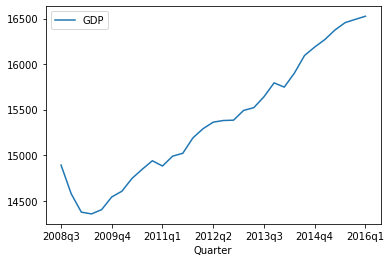

In [65]:
import matplotlib.pyplot as plt
new_gdp.plot.line()

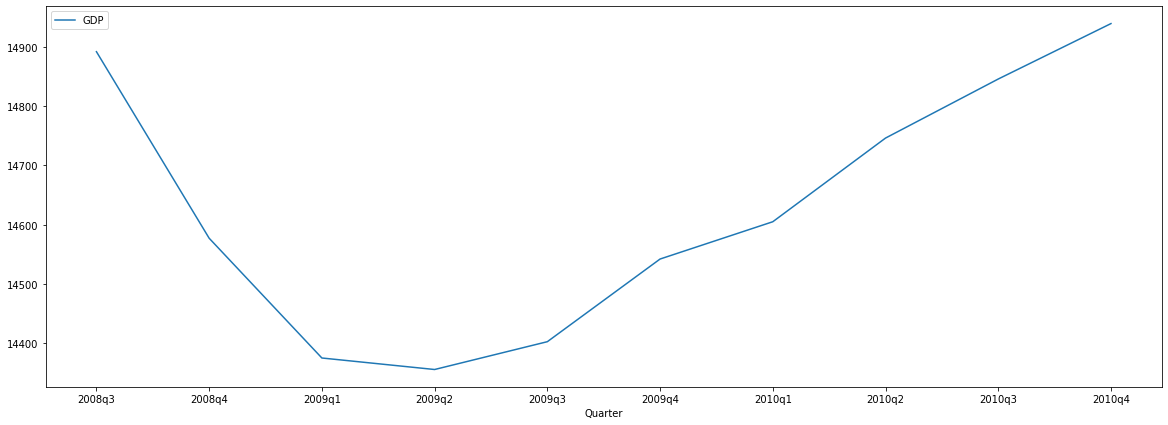

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,7))
ax = sns.lineplot(data = new_gdp[0:10])


In [67]:
gdp

,Quarter,GDP
0,2000q1,12359.1
1,2000q2,12592.5
2,2000q3,12607.7
3,2000q4,12679.3
4,2001q1,12643.3
...,...,...
61,2015q2,16374.2
62,2015q3,16454.9
63,2015q4,16490.7
64,2016q1,16525.0


In [68]:
new_dfh

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0
California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,...,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0
Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,...,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0
Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,...,113733.333333,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.333333,128700.0
Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,126533.333333,128366.666667,...,164266.666667,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333,187900.000000,191433.333333,195200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin,Town of Wrightstown,101766.666667,105400.000000,111366.666667,114866.666667,125966.666667,129900.000000,129900.000000,129433.333333,131900.000000,134200.000000,...,144866.666667,146866.666667,149233.333333,148666.666667,149333.333333,149866.666667,149933.333333,149833.333333,151266.666667,155000.0
New York,Urbana,79200.000000,81666.666667,91700.000000,98366.666667,94866.666667,98533.333333,102966.666667,98033.333333,93966.666667,94600.000000,...,132133.333333,137033.333333,140066.666667,141700.000000,137866.666667,136466.666667,136166.666667,138966.666667,144200.000000,143000.0
Wisconsin,New Denmark,114566.666667,119266.666667,126066.666667,131966.666667,143800.000000,146966.666667,148366.666667,149166.666667,153133.333333,156733.333333,...,174566.666667,181166.666667,186166.666667,187600.000000,188666.666667,188433.333333,188933.333333,191066.666667,192833.333333,197600.0


In [69]:
df

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
...,...,...
512,Wisconsin,River Falls
513,Wisconsin,Stevens Point
514,Wisconsin,Waukesha
515,Wisconsin,Whitewater


In [70]:
rec_bottom

'2009q2'

In [71]:
rec_start

'2008q3'

In [72]:
hdata = new_dfh

In [73]:
hdata["ratio"] = (hdata[rec_start] - hdata[rec_bottom])/hdata[rec_start]

In [74]:
hdata

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3,ratio
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0,0.067898
California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,...,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0,0.118424
Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,...,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0,0.053017
Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,...,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.333333,128700.0,0.006556
Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,126533.333333,128366.666667,...,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333,187900.000000,191433.333333,195200.0,0.131774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin,Town of Wrightstown,101766.666667,105400.000000,111366.666667,114866.666667,125966.666667,129900.000000,129900.000000,129433.333333,131900.000000,134200.000000,...,146866.666667,149233.333333,148666.666667,149333.333333,149866.666667,149933.333333,149833.333333,151266.666667,155000.0,0.032078
New York,Urbana,79200.000000,81666.666667,91700.000000,98366.666667,94866.666667,98533.333333,102966.666667,98033.333333,93966.666667,94600.000000,...,137033.333333,140066.666667,141700.000000,137866.666667,136466.666667,136166.666667,138966.666667,144200.000000,143000.0,-0.046932
Wisconsin,New Denmark,114566.666667,119266.666667,126066.666667,131966.666667,143800.000000,146966.666667,148366.666667,149166.666667,153133.333333,156733.333333,...,181166.666667,186166.666667,187600.000000,188666.666667,188433.333333,188933.333333,191066.666667,192833.333333,197600.0,-0.018993


In [75]:
hdata

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3,ratio
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0,0.067898
California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,...,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0,0.118424
Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,...,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0,0.053017
Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,...,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.333333,128700.0,0.006556
Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,126533.333333,128366.666667,...,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333,187900.000000,191433.333333,195200.0,0.131774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin,Town of Wrightstown,101766.666667,105400.000000,111366.666667,114866.666667,125966.666667,129900.000000,129900.000000,129433.333333,131900.000000,134200.000000,...,146866.666667,149233.333333,148666.666667,149333.333333,149866.666667,149933.333333,149833.333333,151266.666667,155000.0,0.032078
New York,Urbana,79200.000000,81666.666667,91700.000000,98366.666667,94866.666667,98533.333333,102966.666667,98033.333333,93966.666667,94600.000000,...,137033.333333,140066.666667,141700.000000,137866.666667,136466.666667,136166.666667,138966.666667,144200.000000,143000.0,-0.046932
Wisconsin,New Denmark,114566.666667,119266.666667,126066.666667,131966.666667,143800.000000,146966.666667,148366.666667,149166.666667,153133.333333,156733.333333,...,181166.666667,186166.666667,187600.000000,188666.666667,188433.333333,188933.333333,191066.666667,192833.333333,197600.0,-0.018993


In [76]:
hdata_new = hdata[[rec_bottom,rec_start,"ratio"]]

In [77]:
hdata_new

,,2009q2,2008q3,ratio
State,RegionName,,,
New York,New York,465833.333333,499766.666667,0.067898
California,Los Angeles,413900.000000,469500.000000,0.118424
Illinois,Chicago,219700.000000,232000.000000,0.053017
Pennsylvania,Philadelphia,116166.666667,116933.333333,0.006556
Arizona,Phoenix,168233.333333,193766.666667,0.131774
...,...,...,...,...
Wisconsin,Town of Wrightstown,144833.333333,149633.333333,0.032078
New York,Urbana,123433.333333,117900.000000,-0.046932
Wisconsin,New Denmark,178833.333333,175500.000000,-0.018993


In [78]:
hdata_new = hdata_new.reset_index()

In [79]:
hdata_new

,State,RegionName,2009q2,2008q3,ratio
0,New York,New York,465833.333333,499766.666667,0.067898
1,California,Los Angeles,413900.000000,469500.000000,0.118424
2,Illinois,Chicago,219700.000000,232000.000000,0.053017
3,Pennsylvania,Philadelphia,116166.666667,116933.333333,0.006556
4,Arizona,Phoenix,168233.333333,193766.666667,0.131774
...,...,...,...,...,...
10725,Wisconsin,Town of Wrightstown,144833.333333,149633.333333,0.032078
10726,New York,Urbana,123433.333333,117900.000000,-0.046932
10727,Wisconsin,New Denmark,178833.333333,175500.000000,-0.018993
10728,California,Angels,282866.666667,296666.666667,0.046517


In [80]:
unit_town = pd.merge(hdata_new,df,how = "inner",on = ["State","RegionName"])

In [81]:
unit_town

,State,RegionName,2009q2,2008q3,ratio
0,Nevada,Las Vegas,164333.333333,213366.666667,0.229808
1,California,San Diego,389500.000000,424666.666667,0.082810
2,Texas,Dallas,105100.000000,112166.666667,0.063001
3,Texas,Austin,204000.000000,211033.333333,0.033328
4,Ohio,Columbus,109766.666667,112200.000000,0.021687
...,...,...,...,...,...
264,Illinois,Lebanon,120700.000000,122900.000000,0.017901
265,Michigan,Berrien Springs,105733.333333,114466.666667,0.076296
266,Indiana,Oakland City,50866.666667,55166.666667,0.077946
267,Ohio,Oberlin,125100.000000,126433.333333,0.010546


In [82]:
unit_town["uni"] = True

In [83]:
unit_town

,State,RegionName,2009q2,2008q3,ratio,uni
0,Nevada,Las Vegas,164333.333333,213366.666667,0.229808,True
1,California,San Diego,389500.000000,424666.666667,0.082810,True
2,Texas,Dallas,105100.000000,112166.666667,0.063001,True
3,Texas,Austin,204000.000000,211033.333333,0.033328,True
4,Ohio,Columbus,109766.666667,112200.000000,0.021687,True
...,...,...,...,...,...,...
264,Illinois,Lebanon,120700.000000,122900.000000,0.017901,True
265,Michigan,Berrien Springs,105733.333333,114466.666667,0.076296,True
266,Indiana,Oakland City,50866.666667,55166.666667,0.077946,True
267,Ohio,Oberlin,125100.000000,126433.333333,0.010546,True


In [84]:
hdata_2 = pd.merge(hdata_new,unit_town,how = "outer",on = ["State","RegionName",rec_bottom,rec_start,"ratio"])

In [85]:
hdata_2

,State,RegionName,2009q2,2008q3,ratio,uni
0,New York,New York,465833.333333,499766.666667,0.067898,NaN
1,California,Los Angeles,413900.000000,469500.000000,0.118424,NaN
2,Illinois,Chicago,219700.000000,232000.000000,0.053017,NaN
3,Pennsylvania,Philadelphia,116166.666667,116933.333333,0.006556,NaN
4,Arizona,Phoenix,168233.333333,193766.666667,0.131774,NaN
...,...,...,...,...,...,...
10725,Wisconsin,Town of Wrightstown,144833.333333,149633.333333,0.032078,NaN
10726,New York,Urbana,123433.333333,117900.000000,-0.046932,NaN
10727,Wisconsin,New Denmark,178833.333333,175500.000000,-0.018993,NaN
10728,California,Angels,282866.666667,296666.666667,0.046517,NaN


In [86]:
hdata_2["uni"] = hdata_2["uni"].fillna(False)

In [87]:
uni = hdata_2[hdata_2["uni"] == True]

In [88]:
nut = hdata_2[hdata_2["uni"]==False]

In [89]:
uni

,State,RegionName,2009q2,2008q3,ratio,uni
5,Nevada,Las Vegas,164333.333333,213366.666667,0.229808,True
6,California,San Diego,389500.000000,424666.666667,0.082810,True
7,Texas,Dallas,105100.000000,112166.666667,0.063001,True
11,Texas,Austin,204000.000000,211033.333333,0.033328,True
13,Ohio,Columbus,109766.666667,112200.000000,0.021687,True
...,...,...,...,...,...,...
9655,Michigan,Berrien Springs,105733.333333,114466.666667,0.076296,True
9851,Indiana,Oakland City,50866.666667,55166.666667,0.077946,True
9898,Ohio,Oberlin,125100.000000,126433.333333,0.010546,True
10207,Texas,Keene,95900.000000,98900.000000,0.030334,True


In [90]:
nut

,State,RegionName,2009q2,2008q3,ratio,uni
0,New York,New York,465833.333333,499766.666667,0.067898,False
1,California,Los Angeles,413900.000000,469500.000000,0.118424,False
2,Illinois,Chicago,219700.000000,232000.000000,0.053017,False
3,Pennsylvania,Philadelphia,116166.666667,116933.333333,0.006556,False
4,Arizona,Phoenix,168233.333333,193766.666667,0.131774,False
...,...,...,...,...,...,...
10725,Wisconsin,Town of Wrightstown,144833.333333,149633.333333,0.032078,False
10726,New York,Urbana,123433.333333,117900.000000,-0.046932,False
10727,Wisconsin,New Denmark,178833.333333,175500.000000,-0.018993,False
10728,California,Angels,282866.666667,296666.666667,0.046517,False


In [91]:
from scipy.stats import ttest_ind

In [92]:
t,p = ttest_ind(uni["ratio"].dropna(),nut["ratio"].dropna())

In [93]:
def hypo():
    t,p = ttest_ind(uni["ratio"].dropna(),nut["ratio"].dropna())
    if p < 0.01 :
        different = True
    else:
        different = False
    if uni["ratio"].mean()<nut["ratio"].mean():
        better = "university"
    else:
        better = "non-university"
    return (p,different,better)

In [94]:
hypo()

(0.008975587540712617, True, 'university')